<a href="https://colab.research.google.com/github/Shilpavijay2/Algorithms-for-Optimization/blob/main/Sentiment_Analysis_on_Books(NLP_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting Data


In [7]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data.
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="header-ad").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://lyricsraag.com/jab-saiyaan-translation-gangubai-kathiawadi/',
         'https://lyricsraag.com/gehraiyaan-title-song-tu-marz-hai-dawa-bhi/',
         'https://lyricsraag.com/doobe-gehraiyaan-translation/',
         'https://lyricsraag.com/tham-sa-gaya-ranjish-hi-sahi-translation/',
         'https://lyricsraag.com/tumhein-mohabbat-hai-atrangi-re/']


# singers names
singers = ['A M Turaz','lothika','Kausar Munir','Kausar Munir','Arijit Singh']


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd drive/MyDrive/Datasets/

/content/drive/MyDrive/Datasets


In [9]:
import pandas as pd
song = pd.read_csv("song.csv") 

In [11]:
import pandas as pd
song = pd.read_csv("song.csv") 

In [12]:
song.head(5)

,urls=['https://lyricsraag.com/jab-saiyaan-translation-gangubai-kathiawadi/',Unnamed: 1
0,'https://lyricsraag.com/gehraiyaan-title-song-...,NaN
1,'https://lyricsraag.com/doobe-gehraiyaan-trans...,NaN
2,'https://lyricsraag.com/tham-sa-gaya-ranjish-h...,NaN
3,'https://lyricsraag.com/tumhein-mohabbat-hai-a...,NaN


In [13]:
song.columns

Index(['urls=['https://lyricsraag.com/jab-saiyaan-translation-gangubai-kathiawadi/'', 'Unnamed: 1'], dtype='object')

In [14]:
song.shape

(4, 2)

In [17]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

AttributeError: ignored

In [ ]:
# # Pickle files for later use

# # Make a new directory to hold the text files
#!mkdir transcripts

for i, c in enumerate(books):
     with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(books):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['AIW', 'Crime', 'GULLIVER', 'Tarzan', 'Sherlock', 'moonstone'])

In [ ]:
# More checks
data['Tarzan'][:2]

['\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upon the narrator\r\nfor the beginning of it, and my own skeptical incredulity during the days that\r\nfollowed for the balance of the strange tale.\r\n',
 '\r\nWhen my convivial host discovered that he had told me so much, and that I was\r\nprone to doubtfulness, his foolish pride assumed the task the old vintage had\r\ncommenced, and so he unearthed written evidence in the form of musty\r\nmanuscript, and dry official records of the British Colonial Office to support\r\nmany of the salient features of his remarkable narrative.\r\n']

In [ ]:
data['Crime'][:2]

['\r\n      A few words about Dostoevsky himself may help the English reader to\r\n      understand his work.\r\n    ',
 '\r\n      Dostoevsky was the son of a doctor. His parents were very hard-working and\r\n      deeply religious people, but so poor that they lived with their five\r\n      children in only two rooms. The father and mother spent their evenings in\r\n      reading aloud to their children, generally from books of a serious\r\n      character.\r\n    ']

# Cleaning The Data

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'AIW'

In [ ]:
# Notice that our dictionary is currently in key: books, value: list of text format
next(iter(data.values()))

['\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into the book her sister\r\nwas reading, but it had no pictures or conversations in it, “and what is\r\nthe use of a book,” thought Alice “without pictures or\r\nconversations?”\r\n',
 '\r\nSo she was considering in her own mind (as well as she could, for the hot day\r\nmade her feel very sleepy and stupid), whether the pleasure of making a\r\ndaisy-chain would be worth the trouble of getting up and picking the daisies,\r\nwhen suddenly a White Rabbit with pink eyes ran close by her.\r\n',
 '\r\nThere was nothing so very remarkable in that; nor did Alice think it so\r\nvery much out of the way to hear the Rabbit say to itself, “Oh\r\ndear! Oh dear! I shall be late!” (when she thought it over afterwards, it\r\noccurred to her that she ought to have wondered at this, but at the time it all\r\nseemed quite natural); but when the Rabbit actually too

In [ ]:
# We are going to change this to key: books, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ..."
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l..."
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo..."
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...


In [ ]:
# Let's take a look at the transcript for crime
data_df.transcript.loc['Crime']

'\r\n      A few words about Dostoevsky himself may help the English reader to\r\n      understand his work.\r\n     \r\n      Dostoevsky was the son of a doctor. His parents were very hard-working and\r\n      deeply religious people, but so poor that they lived with their five\r\n      children in only two rooms. The father and mother spent their evenings in\r\n      reading aloud to their children, generally from books of a serious\r\n      character.\r\n     \r\n      Though always sickly and delicate Dostoevsky came out third in the final\r\n      examination of the Petersburg school of Engineering. There he had already\r\n      begun his first work, “Poor Folk.”\r\n      \r\n      This story was published by the poet Nekrassov in his review and was\r\n      received with acclamations. The shy, unknown youth found himself instantly\r\n      something of a celebrity. A brilliant and successful career seemed to open\r\n      before him, but those hopes were soon dashed. In 1849 he w

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
AIW,\r\nalice was beginning to get very tired of sitting by her sister on the bank and\r\nof having nothing to do once or twice she had peeped into th...
Crime,\r\n a few words about dostoevsky himself may help the english reader to\r\n understand his work\r\n \r\n dostoevsky was the so...
GULLIVER,\r\n\r\n \r\nthe author of these travels mr lemuel gulliver is my ancient and intimate\r\nfriend there is likewise some relation between us on the...
Sherlock,\nto sherlock holmes she\r\nis always the woman i have seldom heard him mention her under any other\r\nname in his eyes she eclipses and predomina...
Tarzan,\r\ni had this story from one who had no business to tell it to me or to any\r\nother i may credit the seductive influence of an old vintage upon ...
moonstone,\nextracted from a family paper\n \r\ni address these lines—written in india—to my relatives in england\r\n \r\nmy object is to explain the motive...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
AIW,\ralice was beginning to get very tired of sitting by her sister on the bank and\rof having nothing to do once or twice she had peeped into the bo...
Crime,\r a few words about dostoevsky himself may help the english reader to\r understand his work\r \r dostoevsky was the son of a d...
GULLIVER,\r\r \rthe author of these travels mr lemuel gulliver is my ancient and intimate\rfriend there is likewise some relation between us on the mothers...
Sherlock,to sherlock holmes she\ris always the woman i have seldom heard him mention her under any other\rname in his eyes she eclipses and predominates th...
Tarzan,\ri had this story from one who had no business to tell it to me or to any\rother i may credit the seductive influence of an old vintage upon the ...
moonstone,extracted from a family paper \ri address these lines—written in india—to my relatives in england\r \rmy object is to explain the motive which has...


In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ..."
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l..."
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo..."
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...


In [ ]:
# Let's add the books' full names as well
full_names = ['Alice in WonderLand', 'Crime and Punishment', 'Gullivers Travels', 'Sherlock Holmes', 'Tarzan of the Apes', 'The MoonStone']

data_df['full_name'] = full_names
data_df

,transcript,full_name
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ...",Alice in WonderLand
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...,Crime and Punishment
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l...",Gullivers Travels
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...,Sherlock Holmes
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo...",Tarzan of the Apes
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...,The MoonStone


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abhorrent,able,aboard,absolute,absolutely,absorb,absurdly,accent,accentuated,accept,acclamations,accomplice,accomplished,accord,accorded,account,accused,accuser,accustomed,achievement,acknowledge,acknowledging,acquaintance,act,action,actions,active,activity,actor,actress,actually,acute,added,address,addressing,adjusted,adler,admirable,admirably,...,works,world,worn,worse,worship,worshipped,worth,worthy,wouldnt,wound,wounded,wounding,woven,wrangle,wreckage,wrist,write,writer,writes,writing,writings,written,wronged,wrote,wy,yawn,ye,year,years,yelling,yellow,yer,yes,yesteday,yesterday,youll,young,youre,youth,zealand
AIW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
Crime,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,1,0
GULLIVER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
Sherlock,1,1,3,0,1,3,1,0,1,0,0,0,1,1,0,0,3,0,0,3,0,0,0,1,0,1,1,1,1,1,1,0,1,1,6,1,2,13,2,2,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,3,1,3,0,1,0,1,3,0,0,0,4,0,1,1,4,0,1,0
Tarzan,0,0,1,2,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,5,1,4,0,1,3,0,1,0,0,6,0,0,0
moonstone,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,2,0,0,0,1,1,0,0,1,0,0,2,0,0,0,0,3,0,0,0,0,0,0,2,1,3,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data Analysis

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,AIW,Crime,GULLIVER,Sherlock,Tarzan,moonstone
abandoned,0,0,0,1,0,0
abhorrent,0,0,0,1,0,0
able,0,0,0,3,1,0
aboard,0,0,0,0,2,0
absolute,0,0,0,1,0,0


In [ ]:
# Find the top 100 words in the book
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'AIW': [('alice', 27),
  ('little', 15),
  ('like', 11),
  ('way', 11),
  ('think', 11),
  ('thought', 8),
  ('said', 8),
  ('time', 8),
  ('door', 7),
  ('eat', 7),
  ('went', 7),
  ('rabbit', 6),
  ('say', 6),
  ('going', 6),
  ('wonder', 6),
  ('key', 6),
  ('table', 5),
  ('tried', 5),
  ('suddenly', 5),
  ('use', 5),
  ('shall', 5),
  ('things', 5),
  ('hall', 4),
  ('marked', 4),
  ('poor', 4),
  ('bottle', 4),
  ('dinah', 4),
  ('garden', 4),
  ('moment', 4),
  ('oh', 4),
  ('soon', 4),
  ('right', 4),
  ('bats', 4),
  ('quite', 4),
  ('fall', 4),
  ('fell', 4),
  ('got', 4),
  ('people', 4),
  ('cats', 4),
  ('looked', 4),
  ('hand', 3),
  ('good', 3),
  ('passage', 3),
  ('small', 3),
  ('candle', 3),
  ('drink', 3),
  ('golden', 3),
  ('pictures', 3),
  ('came', 3),
  ('glass', 3),
  ('getting', 3),
  ('cake', 3),
  ('large', 3),
  ('poison', 3),
  ('did', 3),
  ('nice', 3),
  ('seen', 3),
  ('know', 3),
  ('come', 3),
  ('words', 3),
  ('just', 3),
  ('began', 3),
  ('ill',

In [ ]:
#Print the top 40 words in each book
for book, top_words in top_dict.items():
    print(book)
    print(', '.join([word for word, count in top_words[0:40]]))
    print('---')

AIW
alice, little, like, way, think, thought, said, time, door, eat, went, rabbit, say, going, wonder, key, table, tried, suddenly, use, shall, things, hall, marked, poor, bottle, dinah, garden, moment, oh, soon, right, bats, quite, fall, fell, got, people, cats, looked
---
Crime
dostoevsky, man, condemned, life, years, work, months, words, death, spent, wife, later, followed, soon, deeply, great, brother, mihail, read, wisdom, reading, poor, suffered, religious, censorship, journal, received, russia, started, came, suffering, brothers, children, heart, sentence, died, intention, understand, insight, insists
---
GULLIVER
mr, author, gulliver, redriff, work, fit, house, nottinghamshire, came, relating, hands, say, papers, large, neighbours, style, likewise, little, good, fault, father, oxfordshire, apparent, entertainment, weary, persons, tides, relation, strike, small, scribbles, authors, apprehend, young, management, manner, politics, pages, purchase, sympson
---
Sherlock
holmes, said

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words in each book
words = []
for book in data.columns:
    top = [word for (word, count) in top_dict[book]]
    for t in top:
        words.append(t)
        
words

['alice',
 'little',
 'like',
 'way',
 'think',
 'thought',
 'said',
 'time',
 'door',
 'eat',
 'went',
 'rabbit',
 'say',
 'going',
 'wonder',
 'key',
 'table',
 'tried',
 'suddenly',
 'use',
 'shall',
 'things',
 'hall',
 'marked',
 'poor',
 'bottle',
 'dinah',
 'garden',
 'moment',
 'oh',
 'soon',
 'right',
 'bats',
 'quite',
 'fall',
 'fell',
 'got',
 'people',
 'cats',
 'looked',
 'hand',
 'good',
 'passage',
 'small',
 'candle',
 'drink',
 'golden',
 'pictures',
 'came',
 'glass',
 'getting',
 'cake',
 'large',
 'poison',
 'did',
 'nice',
 'seen',
 'know',
 'come',
 'words',
 'just',
 'began',
 'ill',
 'round',
 'long',
 'look',
 'remember',
 'sort',
 'head',
 'book',
 'having',
 'trying',
 'dark',
 'dear',
 'rabbithole',
 'saw',
 'forgotten',
 'feet',
 'ask',
 'finished',
 'rules',
 'rate',
 'reach',
 'finding',
 'ran',
 'happen',
 'generally',
 'great',
 'larger',
 'late',
 'latitude',
 'bit',
 'begun',
 'jar',
 'ive',
 'itll',
 'inches',
 'beautifully',
 'longitude',
 'low',
 

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('good', 5),
 ('came', 5),
 ('little', 4),
 ('said', 4),
 ('door', 4),
 ('hand', 4),
 ('small', 4),
 ('seen', 4),
 ('words', 4),
 ('man', 4),
 ('like', 3),
 ('way', 3),
 ('time', 3),
 ('say', 3),
 ('moment', 3),
 ('right', 3),
 ('did', 3),
 ('come', 3),
 ('just', 3),
 ('saw', 3),
 ('great', 3),
 ('family', 3),
 ('heard', 3),
 ('left', 3),
 ('men', 3),
 ('alice', 2),
 ('think', 2),
 ('went', 2),
 ('shall', 2),
 ('poor', 2),
 ('oh', 2),
 ('soon', 2),
 ('quite', 2),
 ('fell', 2),
 ('got', 2),
 ('looked', 2),
 ('large', 2),
 ('know', 2),
 ('began', 2),
 ('long', 2),
 ('look', 2),
 ('dark', 2),
 ('dear', 2),
 ('reach', 2),
 ('generally', 2),
 ('begun', 2),
 ('years', 2),
 ('work', 2),
 ('wife', 2),
 ('followed', 2),
 ('understand', 2),
 ('service', 2),
 ('second', 2),
 ('reader', 2),
 ('father', 2),
 ('set', 2),
 ('mr', 2),
 ('house', 2),
 ('young', 2),
 ('twice', 2),
 ('sea', 2),
 ('friend', 2),
 ('native', 2),
 ('true', 2),
 ('matter', 2),
 ('room', 2),
 ('open', 2),
 ('face', 2),
 ('lad

In [ ]:
# If more than half of the books have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

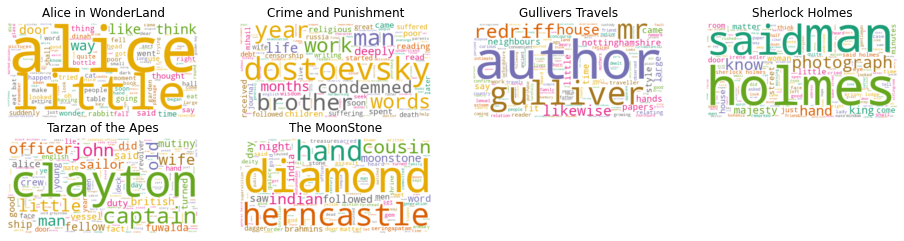

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Alice in WonderLand', 'Crime and Punishment', 'Gullivers Travels', 'Sherlock Holmes', 'Tarzan of the Apes', 'The MoonStone']

# Create subplots for each books
for index, book in enumerate(data.columns):
    wc.generate(data_clean.transcript[book])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Number of Words


### Analysis

In [ ]:
# Find the number of unique words that each books have

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for book in data.columns:
    uniques = data[book].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['book', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,book,unique_words
2,Gullivers Travels,154
1,Crime and Punishment,282
0,Alice in WonderLand,457
5,The MoonStone,566
4,Tarzan of the Apes,958
3,Sherlock Holmes,1707


### Findings

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('good', 5),
 ('came', 5),
 ('little', 4),
 ('said', 4),
 ('door', 4),
 ('hand', 4),
 ('small', 4),
 ('seen', 4),
 ('words', 4),
 ('man', 4),
 ('like', 3),
 ('way', 3),
 ('time', 3),
 ('say', 3),
 ('moment', 3),
 ('right', 3),
 ('did', 3),
 ('come', 3),
 ('just', 3),
 ('saw', 3),
 ('great', 3),
 ('family', 3),
 ('heard', 3),
 ('left', 3),
 ('men', 3),
 ('alice', 2),
 ('think', 2),
 ('went', 2),
 ('shall', 2),
 ('poor', 2),
 ('oh', 2),
 ('soon', 2),
 ('quite', 2),
 ('fell', 2),
 ('got', 2),
 ('looked', 2),
 ('large', 2),
 ('know', 2),
 ('began', 2),
 ('long', 2),
 ('look', 2),
 ('dark', 2),
 ('dear', 2),
 ('reach', 2),
 ('generally', 2),
 ('begun', 2),
 ('years', 2),
 ('work', 2),
 ('wife', 2),
 ('followed', 2),
 ('understand', 2),
 ('service', 2),
 ('second', 2),
 ('reader', 2),
 ('father', 2),
 ('set', 2),
 ('mr', 2),
 ('house', 2),
 ('young', 2),
 ('twice', 2),
 ('sea', 2),
 ('friend', 2),
 ('native', 2),
 ('true', 2),
 ('matter', 2),
 ('room', 2),
 ('open', 2),
 ('face', 2),
 ('lad

### Findings

# Sentiment Analysis

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine


In [ ]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ...",Alice in WonderLand
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...,Crime and Punishment
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l...",Gullivers Travels
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...,Sherlock Holmes
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo...",Tarzan of the Apes
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...,The MoonStone


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ...",Alice in WonderLand,0.028055,0.503597
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...,Crime and Punishment,-0.025057,0.469725
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l...",Gullivers Travels,0.099123,0.495489
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...,Sherlock Holmes,0.105625,0.484915
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo...",Tarzan of the Apes,0.059749,0.471152
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...,The MoonStone,0.078482,0.491209


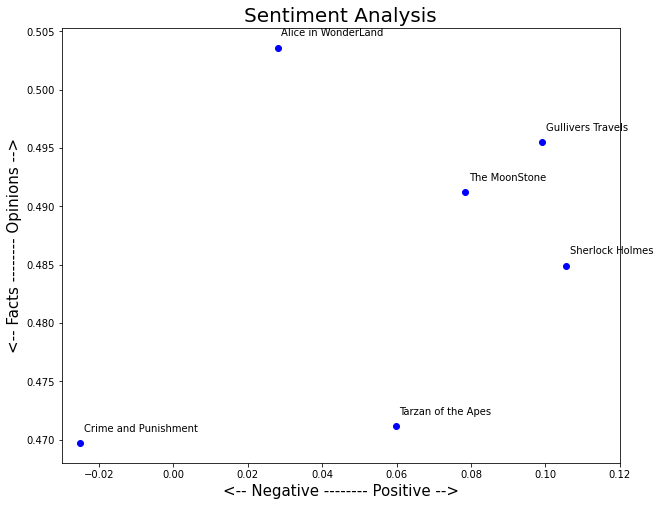

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, book in enumerate(data.index):
    x = data.polarity.loc[book]
    y = data.subjectivity.loc[book]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.03, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
AIW,"\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into ...",Alice in WonderLand,0.028055,0.503597
Crime,\r\n A few words about Dostoevsky himself may help the English reader to\r\n understand his work.\r\n \r\n Dostoevsky was the s...,Crime and Punishment,-0.025057,0.469725
GULLIVER,"\r\n[As given in the original edition.]\r\n \r\nThe author of these Travels, Mr. Lemuel Gulliver, is my ancient and intimate\r\nfriend; there is l...",Gullivers Travels,0.099123,0.495489
Sherlock,\nTo Sherlock Holmes she\r\nis always the woman. I have seldom heard him mention her under any other\r\nname. In his eyes she eclipses and predomi...,Sherlock Holmes,0.105625,0.484915
Tarzan,"\r\nI had this story from one who had no business to tell it to me, or to any\r\nother. I may credit the seductive influence of an old vintage upo...",Tarzan of the Apes,0.059749,0.471152
moonstone,\n(Extracted from a Family Paper.)\n \r\nI address these lines—written in India—to my relatives in England.\r\n \r\nMy object is to explain the mo...,The MoonStone,0.078482,0.491209


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\r\nAlice was beginning to get very tired of sitting by her sister on the bank, and\r\nof having nothing to do: once or twice she had peeped into the book her sister\r\nwas reading, but it had no pictures or conversations in it, “and what is\r\nthe use of a book,” thought Alice “without pictures or\r\nconversations?”\r\n \r\nSo she was considering in her own mind (as well as she could, for the hot day\r\nmade her feel very sleepy and stupid), whether the pleasure of making a\r\ndaisy-chain would be worth the trouble of getting up and picking the daisies,\r\nwhen suddenly a White Rabbit with pink eyes ran close by her.\r\n \r\nThere was nothing so very remarkable in that; nor did Alice think it so\r\nvery much out of the way to hear the Rabbit say to itself, “Oh\r\ndear! Oh dear! I shall be late!” (when she thought it over afterwards, it\r\noccurred to her that she ought to have wondered at this, but at the time it all\r\nseemed quite natural); but when the Rabbit actually took a wat

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

6

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.05973214285714286,
  -0.0030763416477702235,
  0.17588453213453212,
  0.05130251692751694,
  -0.10665204678362573,
  0.015775569636456734,
  0.02081746031746031,
  0.09857142857142856,
  -0.0033737507348618446,
  -0.038425925925925926],
 [-0.16341991341991344,
  0.09,
  -0.029166666666666664,
  -0.05,
  -0.13518518518518519,
  -0.12962962962962962,
  0.10833333333333334,
  -0.23425925925925928,
  0.10303030303030303,
  0.2185606060606061],
 [0.2875,
  0.11249999999999999,
  0.0,
  0.0030612244897959234,
  0.020833333333333332,
  0.09583333333333334,
  0.009523809523809523,
  0.0,
  0.2625,
  0.17285714285714288],
 [0.07034393096081405,
  0.06884290753338373,
  0.09674707602339182,
  0.1135543860359011,
  0.1157539682539682,
  0.06237677015250546,
  0.1053435493652885,
  0.10331349206349205,
  0.16571746780473187,
  0.16183976569569788],
 [0.15603948896631822,
  0.08231951871657754,
  0.023096707818930046,
  -0.01399659863945578,
  0.014209401709401711,
  0.015162037037037038,
  0.1

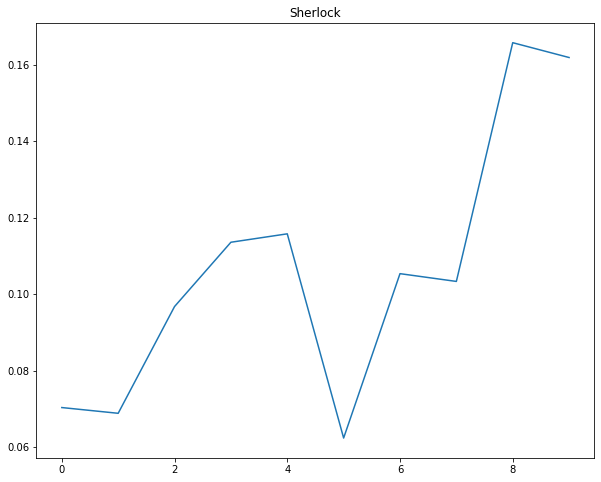

In [ ]:
# Show the plot for one comedian
plt.plot(polarity_transcript[3])
plt.title(data['full_name'].index[3])
plt.show()

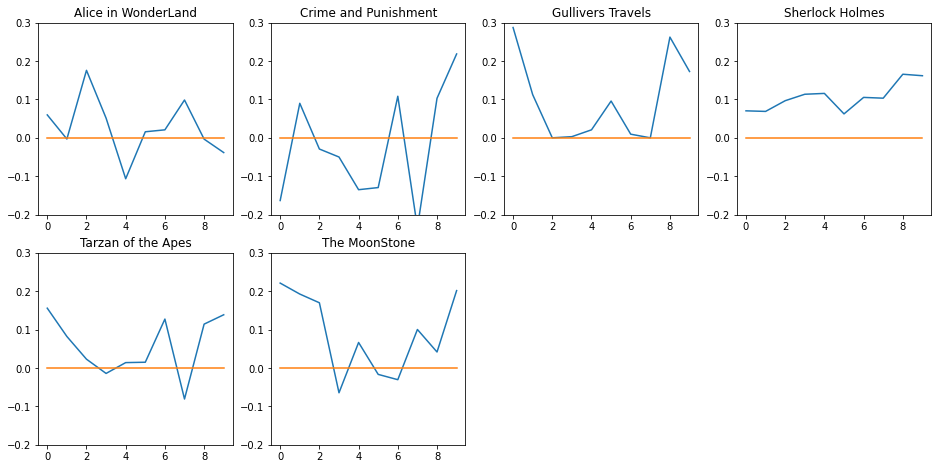

In [ ]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()